In [1]:
from scipy.stats.mstats import winsorize
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import math
import sys
import os

In [2]:
genotyping_path = "../../data/genotyping/"

In order to run grace we can use the same covariate and phenotype file obtained in the individual view step: `2-gwas_mri.ipynb`

In [28]:
covariate_fn = os.path.join(genotyping_path, "Individual_View_MRI/covariate_mri.txt")
covariate    = pd.read_csv(covariate_fn, sep=" ")
covariate

FID   IID       PC1       PC2       PC3       PC4       PC5       PC6  \
0    3000  3000  0.023276  0.001388  0.038709  0.066210 -0.007488 -0.031879   
1    3001  3001  0.015455  0.015081 -0.003603 -0.048339 -0.043131 -0.062836   
2    3002  3002 -0.081952 -0.036330 -0.021848  0.012122  0.028441  0.000976   
3    3004  3004  0.023786  0.032396 -0.006849 -0.002417 -0.050192 -0.047460   
4    3006  3006  0.004083  0.059559  0.101779 -0.011868 -0.002044 -0.047893   
..    ...   ...       ...       ...       ...       ...       ...       ...   
417  4124  4124  0.007144  0.033614  0.037507 -0.020239  0.083795  0.060456   
418  4125  4125 -0.024602  0.025213 -0.024603 -0.013257 -0.081757  0.036857   
419  4126  4126 -0.009287  0.003736 -0.034894  0.068257 -0.002484  0.047716   
420  4136  4136  0.035607 -0.015906 -0.065893 -0.009227  0.050041  0.122428   
421  4139  4139  0.050608 -0.102561 -0.079695  0.004393  0.017226  0.047904   

          PC7       PC8       PC9      PC10  AGE          eTIV  EDUCYRS  
0    0.041703  0.020203  0.025014  0.022119   70  1.569770e+06     18.0  
1    0.035684 -0.040631 -0.082930  0.077641   65  1.715151e+06     16.0  
2   -0.011432 -0.001495 -0.016357 -0.013582   68  1.356459e+06     16.0  
3    0.072574  0.032777 -0.026231  0.006644   60  1.617682e+06     16.0  
4   -0.001750 -0.023662 -0.066335  0.005811   58  1.643901e+06     14.0  
..        ...       ...       ...       ...  ...           ...      ...  
417 -0.002417  0.099991 -0.048913  0.008929   71  1.555452e+06     14.0  
418  0.011633  0.055966  0.115662 -0.039906   64           NaN     21.0  
419  0.100504  0.069558  0.015884  0.016512   56  1.828698e+06     12.0  
420  0.001132  0.089810 -0.051699  0.035799   56  1.650359e+06     13.0  
421 -0.013591  0.067645  0.014851  0.015412   81  1.543326e+06     15.0  

[422 rows x 15 columns]

In the phenotype file the features are already winsorized

In [29]:
phenotype_fn = os.path.join(genotyping_path, "Individual_View_MRI/phenotype_mri.txt")
phenotype    = pd.read_csv(phenotype_fn, sep=" ")
phenotype

FID   IID  ENROLL_CAT  rh_parahippocampal_volume  \
0    3000  3000           1                     2392.0   
1    3001  3001           2                     2053.0   
2    3002  3002           2                     2233.0   
3    3004  3004           1                     2127.0   
4    3006  3006           2                     2623.0   
..    ...   ...         ...                        ...   
417  4124  4124           2                     1582.0   
418  4125  4125           2                        NaN   
419  4126  4126           2                     2091.0   
420  4136  4136           2                     2446.0   
421  4139  4139           1                     1920.0   

     lh_parahippocampal_volume  rh_parahippocampal_area  \
0                       2063.0                    723.0   
1                       2129.0                    721.0   
2                       1612.0                    606.0   
3                       2205.0                    662.0   
4                       3134.0                    693.0   
..                         ...                      ...   
417                     2079.0                    821.0   
418                        NaN                      NaN   
419                     2298.0                    715.0   
420                     2321.0                    843.0   
421                     2009.0                    574.0   

     lh_parahippocampal_area  rh_parahippocampal_thickness  \
0                      680.0                         2.940   
1                      746.0                         2.576   
2                      537.0                         3.086   
3                      696.0                         2.819   
4                      837.0                         3.225   
..                       ...                           ...   
417                    819.0                         2.107   
418                      NaN                           NaN   
419                    789.0                         2.453   
420                    795.0                         2.613   
421                    591.0                         2.948   

     lh_parahippocampal_thickness  
0                           2.656  
1                           2.539  
2                           2.801  
3                           2.885  
4                           3.207  
..                            ...  
417                         2.192  
418                           NaN  
419                         2.453  
420                         2.573  
421                         3.008  

[422 rows x 9 columns]

# Run GRACE

In [ ]:
!Rscript run_grace_mri.R

In [6]:
grace_path = os.path.join(genotyping_path, "Integrated_View_MRI")

In [30]:
fields = ['id','gamma0']
grace_result = pd.read_csv(os.path.join(grace_path, "lh_parahippocampal_area_grace.csv"), usecols=fields)
grace_result 

id     gamma0
0    3000 -16.351173
1    3001  -6.163802
2    3002  -5.127511
3    3004  -5.252208
4    3006 -17.009170
..    ...        ...
383  4123  11.341202
384  4124  -8.728628
385  4126   1.397518
386  4136  -4.820401
387  4139 -19.749559

[388 rows x 2 columns]

In [31]:
phenotype = phenotype.iloc[:,0:3]
phenotype.head(5)

FID   IID  ENROLL_CAT
0  3000  3000           1
1  3001  3001           2
2  3002  3002           2
3  3004  3004           1
4  3006  3006           2

In [32]:
phenotype = phenotype.merge(grace_result, left_on=["FID"], right_on=["id"], how='outer').drop(["id"], axis=1)
phenotype

FID   IID  ENROLL_CAT     gamma0
0    3000  3000           1 -16.351173
1    3001  3001           2  -6.163802
2    3002  3002           2  -5.127511
3    3004  3004           1  -5.252208
4    3006  3006           2 -17.009170
..    ...   ...         ...        ...
417  4124  4124           2  -8.728628
418  4125  4125           2        NaN
419  4126  4126           2   1.397518
420  4136  4136           2  -4.820401
421  4139  4139           1 -19.749559

[422 rows x 4 columns]

In [33]:
phenotype.fillna("NA",inplace=True)
phenotype.to_csv(
    os.path.join(grace_path, "Phenotype.txt"),
    header=True,
    index=False,
    sep=" "
)

In [36]:
ppmi_eu_final_fn = os.path.join(genotyping_path, "PPMI_eu_noswedd_ds")
pheno_fn         = os.path.join(grace_path, "Phenotype.txt")
cov_fn           = os.path.join(genotyping_path, "Individual_View_MRI/covariate_mri.txt")
res_fn           = os.path.join(grace_path, "Grace_MRI")

In [37]:
!plink --bfile {ppmi_eu_final_fn} --pheno {pheno_fn} --covar {cov_fn} --pheno-name gamma0 --covar-name AGE,eTIV,PC1-PC5,EDUCYRS --allow-no-sex --linear hide-covar sex --adjust --out {res_fn} 

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/genotyping/Integrated_View_MRI/Grace_MRI.log.
Options in effect:
  --adjust
  --allow-no-sex
  --bfile ../../data/genotyping/PPMI_eu_noswedd_ds
  --covar ../../data/genotyping/Individual_View_MRI/covariate_mri.txt
  --covar-name AGE,eTIV,PC1-PC5,EDUCYRS
  --linear hide-covar sex
  --out ../../data/genotyping/Integrated_View_MRI/Grace_MRI
  --pheno ../../data/genotyping/Integrated_View_MRI/Phenotype.txt
  --pheno-name gamma0

32768 MB RAM detected; reserving 16384 MB for main workspace.
129241 variants loaded from .bim file.
422 people (286 males, 136 females) loaded from .fam.
388 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 8 out of 13 covariates loaded.
34 people had missing value(s).
Before main variant filters, 422 founders and 0 nonfounders pres

In [ ]:
!Rscript plot_mri_Grace.R

In [38]:
results_fn = "../../results/integratedView/MRI"

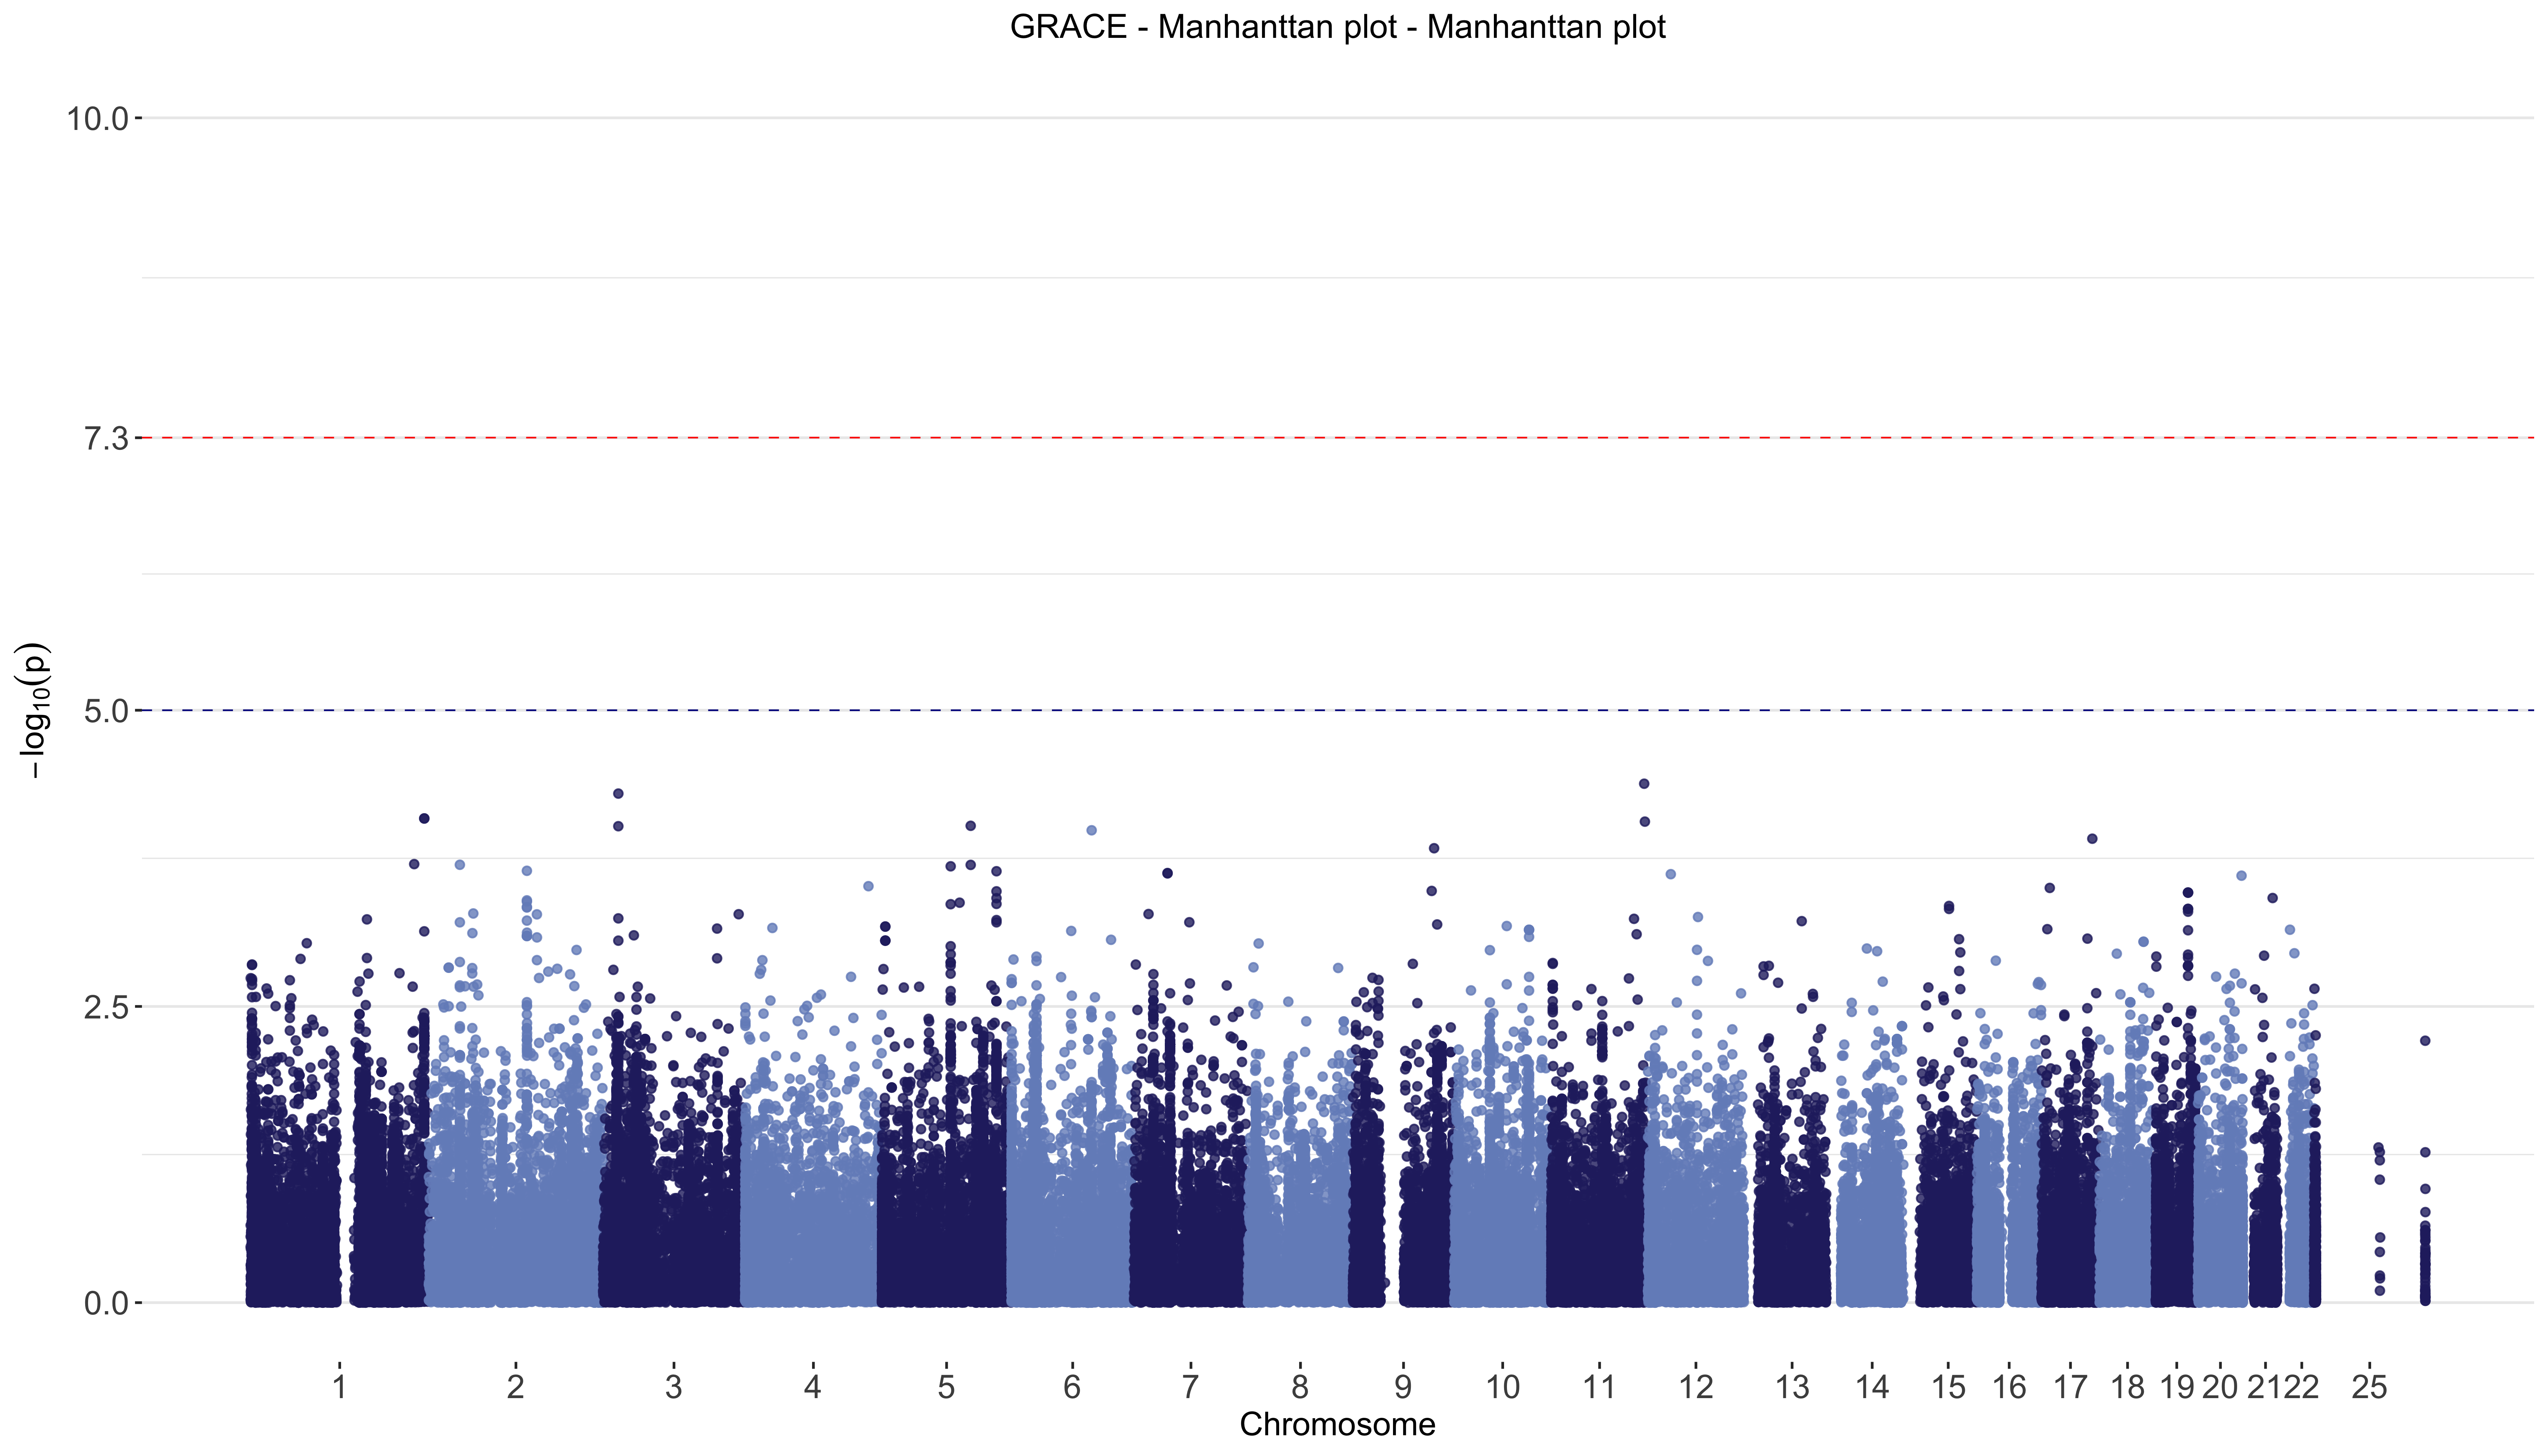

In [39]:
Image.open(os.path.join(results_fn, "Manhattan_mri_Grace.png"))

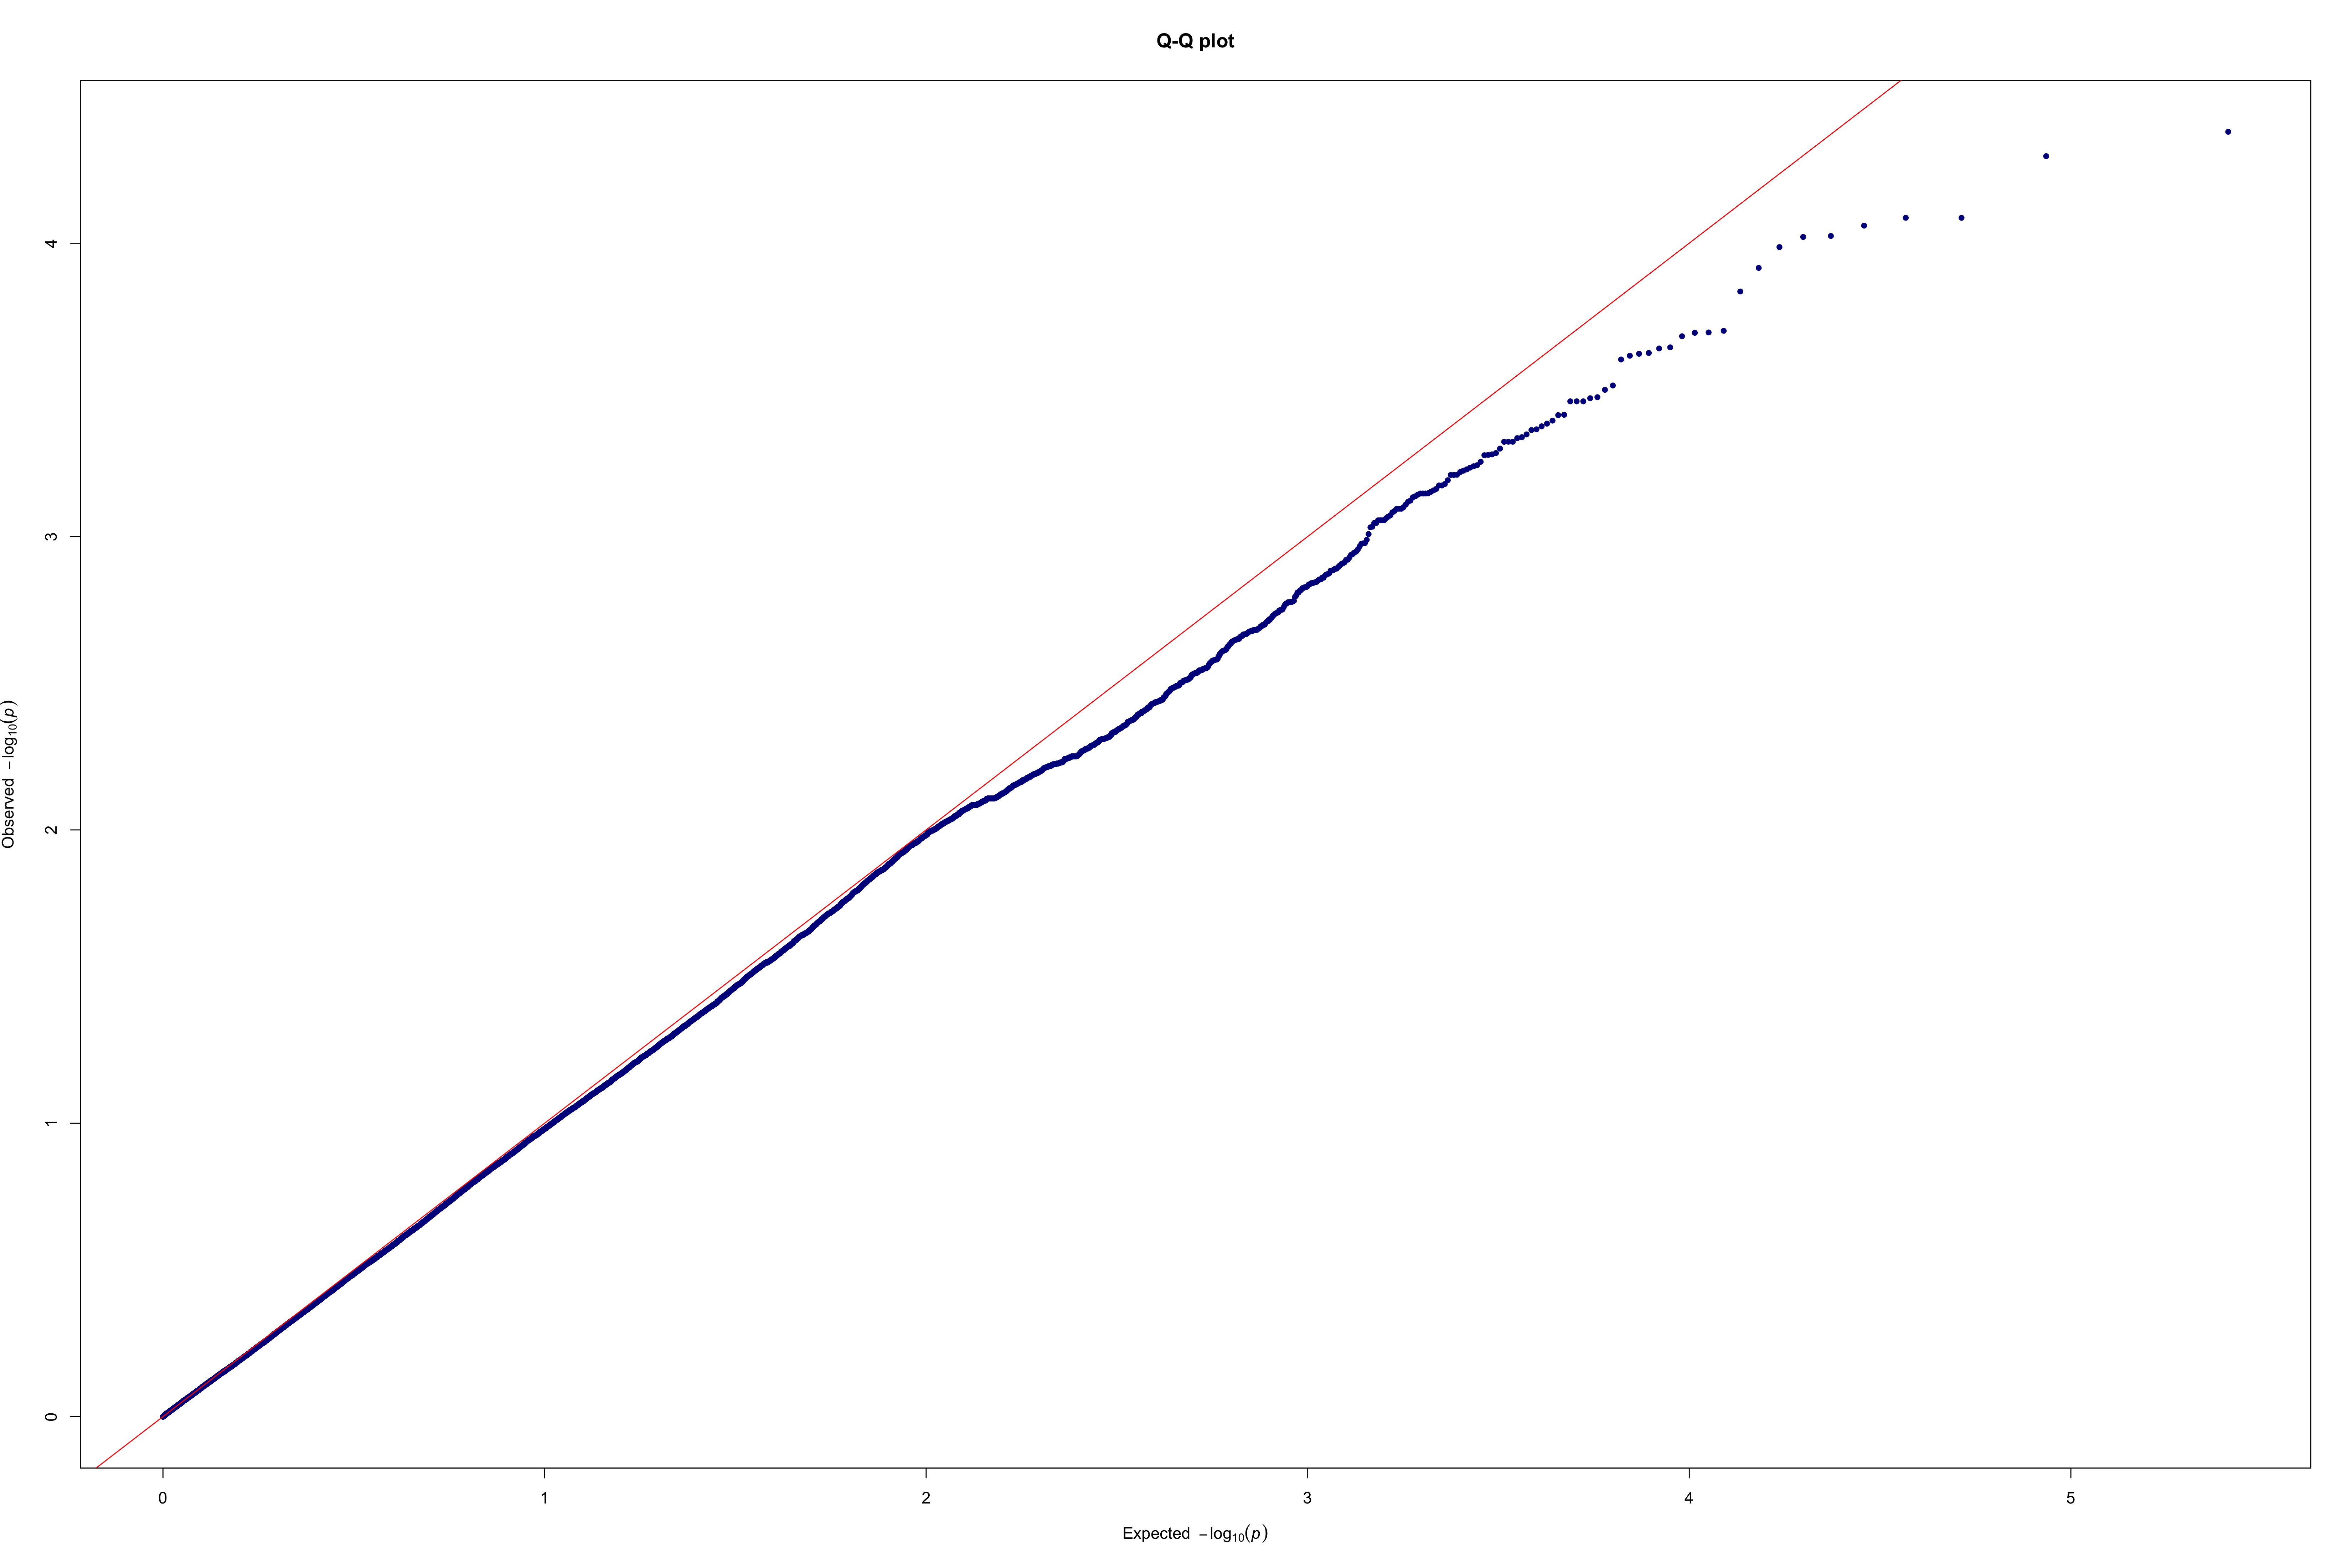

In [40]:
Image.open(os.path.join(results_fn, "QQ_mri_Grace.png"))